## <font color="Blue">**Cada etapa deste projeto está baseado na metodologia CRISP-DM**.

In [832]:
# Importação das bibliotecas necessárias para analisar/transformar os dados
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from paretochart import pareto
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler


warnings.filterwarnings('ignore')

## <font color="Blue">**Etapa 1: Assumindo que a etapa de Business Understand já foi feita, começaremos com Data Understanding. Nesta etapa de entender os dados, foi observado que existem poucas amostras de projetos, então, baseado no CRISP-DM o correto seria voltar à etapa de Business para tentar entender mais do negócio e buscar a melhor solução para dar prosseguimento ao projeto. Entretanto, como estou em um desafio, assumirei que realmente não há mais dados e aplicarei técnicas de _data augmentation_ para aumentar a quantidade de amostras baseadas nos dados fornecidos a fim de melhorar a generalização e a robustez do modelo, expondo-o a uma variedade maior de exemplos.**

## <font color="Blue">**Etapa 2: Data understanding**

In [833]:
# Download da base (projeto 1)
df1 = pd.read_csv('amostra_projeto1.csv')
df1

,DADOS,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Titulo,Projeto 1 - Wa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tipologia,Térrea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Área Terreno,"485,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Área Construída,"246,63",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Área Fundação,"237,98",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,16.,NaN,NaN,NaN,FORMALIZACAO DA ENTREGA,NaN,NaN,"0,0%",NaN,NaN,NaN,"R$ 912,85",NaN,"R$ 912,85"
159,16.1.,NaN,NaN,NaN,HABITE-SE E AVERBACAO,NaN,NaN,"0,0%",NaN,NaN,NaN,"R$ 912,85",NaN,"R$ 912,85"
160,16.1.1,MKS_COMPOSICOES,COMPOSICAO,CMP_EPO-TAX-AVR,TAXA AVERBACAO,VB,1,"0,0%",NaN,NaN,"R$ 502,85","R$ 502,85","R$ 502,85","R$ 502,85"
161,16.1.2,MKS_COMPOSICOES,COMPOSICAO,CMP_EPO-TAX-HBT,TAXA HABITE-SE PREFEITURA,VB,1,"0,0%",NaN,NaN,"R$ 150,00","R$ 150,00","R$ 150,00","R$ 150,00"


In [834]:
# Download da base (projeto 2)
df2 = pd.read_csv('amostra_projeto_2.csv')
df2

,DADOS,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Titulo,Projeto 2 - Ca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tipologia,Sobrado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Área Terreno,"300,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Área Construída,"249,24",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Área Fundação,"161,55",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,16.,NaN,NaN,NaN,FORMALIZACAO DA ENTREGA,NaN,NaN,"0,0%",NaN,NaN,NaN,"R$ 912,85",NaN,"R$ 912,85"
169,16.1.,NaN,NaN,NaN,HABITE-SE E AVERBACAO,NaN,NaN,"0,0%",NaN,NaN,NaN,"R$ 912,85",NaN,"R$ 912,85"
170,16.1.1,MKS_COMPOSICOES,COMPOSICAO,CMP_EPO-TAX-AVR,TAXA AVERBACAO,VB,1,"0,0%",NaN,NaN,"R$ 502,85","R$ 502,85","R$ 502,85","R$ 502,85"
171,16.1.2,MKS_COMPOSICOES,COMPOSICAO,CMP_EPO-TAX-HBT,TAXA HABITE-SE PREFEITURA,VB,1,"0,0%",NaN,NaN,"R$ 150,00","R$ 150,00","R$ 150,00","R$ 150,00"


In [835]:
# Download da base (projeto 3)
df3 = pd.read_csv('amostra_projeto_3.csv')
df3

,DADOS,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Titulo,Projeto 3 - Je2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tipologia,Sobrado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Área Terreno,"500,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Área Construída,"425,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Área Fundação,"378,31",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,16.,NaN,NaN,NaN,FORMALIZACAO DA ENTREGA,NaN,NaN,"0,0%",NaN,NaN,NaN,"R$ 912,85",NaN,"R$ 912,85"
164,16.1.,NaN,NaN,NaN,HABITE-SE E AVERBACAO,NaN,NaN,"0,0%",NaN,NaN,NaN,"R$ 912,85",NaN,"R$ 912,85"
165,16.1.1,MKS_COMPOSICOES,COMPOSICAO,CMP_EPO-TAX-AVR,TAXA AVERBACAO,VB,1,"0,0%",NaN,NaN,"R$ 502,85","R$ 502,85","R$ 502,85","R$ 502,85"
166,16.1.2,MKS_COMPOSICOES,COMPOSICAO,CMP_EPO-TAX-HBT,TAXA HABITE-SE PREFEITURA,VB,1,"0,0%",NaN,NaN,"R$ 150,00","R$ 150,00","R$ 150,00","R$ 150,00"


In [836]:
# Download da base (projeto 4)
df4 = pd.read_csv('projeto_4.csv')
df4

,DADOS,Unnamed: 1
0,Titulo,Projeto 4 - Je3
1,Tipologia,Sobrado
2,Área Terreno,"250,00"
3,Área Construída,"257,00"
4,Área Fundação,"221,36"
5,Área Fachada,"430,11"
6,Área Parede,"547,27"
7,Qtde BWCs,"6,00"


**Podemos observar que temos duas tabelas: 'DADOS, e 'Orçamento'. A tabela 'DADOS' possui as variáveis independentes e a tabela orçamento possui somente 1 variável que será nosso alvo, que é o custo final do projeto.**

**Este dataset precisará ser reformulado para utilizarmos um modelo preditivo. Serão criadas uma série de funções para generalizar este tratamento.O arquivo .csv possui duas tabelas: 'DADOS' e 'Orçamento'. Apesar de serem duas tabelas, na leitura dos dados temos somente um dataset que está desestruturado. Daí, eu separei estas tabelas e mantive somente as variáveis que serão utilizadas na predição. Podemos observar que as linhas na tabela 'DADOS' e a coluna 'Preço (Total)' na tabela 'Orçamento' serão as variáveis do problema, portanto, uma série de restruturações precisam ser feitas.**

## <font color="Blue">**Etapa 3: Data preparation**

***
### **Tratamento dos dados da "tabela DADOS"**

##### **Abaixo segue as funções que serão utilizadas. Neste trabalho temos somente 3 projetos e os dados poderiam ser digitados, todavia, pensando em otimizar para o caso de muitas tabelas, optei em criar uma série de funções a fim de extrair as informações de tabelas contendo novos projetos. Além disso, como foi mencionado, a quantidade de dados será aumentada.**

In [837]:
def treatment_cols_table_dados(df,col):
    """
    Remove todas as colunas que não fazem parte da "tabela DADOS" do DataFrame.

    Params:
    df (DataFrame): O DataFrame a ser tratado.
    col (str): O prefixo usado para identificar as colunas que devem ser mantidas.

    Return:
    DataFrame: O DataFrame resultante após a remoção das colunas indesejadas.
    """
  
    cols_drop = [col + str(i) for i in range(2, 14)]
    df = df.drop(columns=cols_drop)
  
    return df

def treatment_lines_cols_table_dados(df,inicio,fim,line):
    """
    Realiza tratamentos específicos em um DataFrame para prepará-lo para análise,
    removendo linhas e colunas específicas.

    Params:
    df (DataFrame): O DataFrame a ser tratado.
    inicio (int): Índice da primeira linha a ser mantida.
    fim (int): Índice da última linha (exclusivo) a ser mantida.
    line (int): Índice da linha que contém os nomes descritos na "tabela DADOS".

    Return:
    DataFrame: O DataFrame resultante após a aplicação de todas as etapas de tratamento.
    """

    # Apaga todas as linhas que não fazem parte da "tabela DADOS"
    df = df[inicio:fim]

    # Transpõe linhas em colunas 
    df = df.T

    # Apaga a coluna 0 após transposição, pois ela carrega o nome do projeto que não terá utilidade
    df = df.drop([0],axis=1)
    
    df = df.drop([line])
    
    # Resetando os índices
    df = df.reset_index(drop=True)
    
    return df


def rename_columns(df, *new_columns_names):
    """
    Renomeia as colunas de um dataframe.

    Params:
        df (DataFrame): O dataframe a ser renomeado.
        new_column_names (str): Os novos nomes das colunas, passados como argumentos separados.

    Return:
        DataFrame: O dataframe com as colunas renomeadas.
    """

    new_column_dict = {old_name: new_name for old_name, new_name in zip(df.columns, new_columns_names)}
    
    return df.rename(columns=new_column_dict)

    

In [838]:
def str_float_tab_dados(df, inicio, fim):
    """
    Converte as strings contendo números em formato de vírgula para floats no intervalo de colunas especificado.

    Params:
    df (DataFrame): O DataFrame a ser tratado.
    inicio (int): Índice da primeira coluna a ser convertida.
    fim (int): Índice da última coluna (exclusivo) a ser convertida.

    Return:
    DataFrame: O DataFrame resultante após a conversão das strings para floats no intervalo de colunas especificado.
    """
    for col in df.columns[inicio:fim]:
        df[col] = df[col].str.replace(',', '.').astype(float)

    return df

In [839]:
def concat_data_frames(*args,axis=0):
    """
    Concatena vários DataFrames ao longo de um eixo especificado.

    Params:
    *args (DataFrames): Um ou mais DataFrames a serem concatenados.
    axis (int, opcional): O eixo ao longo do qual os DataFrames serão concatenados.
                            O valor padrão é 0 (concatenação ao longo das linhas).

    Return:
    DataFrame: O DataFrame resultante da concatenação dos DataFrames passados como argumentos.
    """

    df = pd.concat(args,axis=axis)

    # Resetando os índices
    df = df.reset_index(drop=True)
    return df

#### **Aplicação das funções na "tabela DADOS" dos data frames referentes aos projetos 1, 2 e 3**

In [840]:
data1_dados = treatment_cols_table_dados(df1,'Unnamed: ')
data1_1dados = treatment_lines_cols_table_dados(data1_dados,None,8,'DADOS')
data1_1dados

,1,2,3,4,5,6,7
0,Térrea,"485,00","246,63","237,98","597,88","615,86","5,00"


In [841]:
data2_dados = treatment_cols_table_dados(df2,'Unnamed: ')
data2_1dados = treatment_lines_cols_table_dados(data2_dados,None,8,'DADOS')
data2_1dados

,1,2,3,4,5,6,7
0,Sobrado,"300,00","249,24","161,55","747,17","662,06","4,00"


In [842]:
data3_dados = treatment_cols_table_dados(df3,'Unnamed: ')
data3_1dados = treatment_lines_cols_table_dados(data3_dados,None,8,'DADOS')
data3_1dados

,1,2,3,4,5,6,7
0,Sobrado,"500,00","425,00","378,31","521,67","581,76","6,00"


In [843]:
data1_2dados = rename_columns(data1_1dados,'Tipologia','Área do Terreno','Área Construída','Área Fundação','Área Fachada','Área Parede','Qtde BWCs')
data1_2dados

,Tipologia,Área do Terreno,Área Construída,Área Fundação,Área Fachada,Área Parede,Qtde BWCs
0,Térrea,"485,00","246,63","237,98","597,88","615,86","5,00"


In [844]:
data2_2dados = rename_columns(data2_1dados,'Tipologia','Área do Terreno','Área Construída','Área Fundação','Área Fachada','Área Parede','Qtde BWCs')
data2_2dados

,Tipologia,Área do Terreno,Área Construída,Área Fundação,Área Fachada,Área Parede,Qtde BWCs
0,Sobrado,"300,00","249,24","161,55","747,17","662,06","4,00"


In [845]:
data3_2dados = rename_columns(data3_1dados,'Tipologia','Área do Terreno','Área Construída','Área Fundação','Área Fachada','Área Parede','Qtde BWCs')
data3_2dados

,Tipologia,Área do Terreno,Área Construída,Área Fundação,Área Fachada,Área Parede,Qtde BWCs
0,Sobrado,"500,00","425,00","378,31","521,67","581,76","6,00"


In [846]:
str_float_tab_dados(data1_2dados,1,7)

,Tipologia,Área do Terreno,Área Construída,Área Fundação,Área Fachada,Área Parede,Qtde BWCs
0,Térrea,485.0,246.63,237.98,597.88,615.86,5.0


In [847]:
str_float_tab_dados(data2_2dados,1,7)

,Tipologia,Área do Terreno,Área Construída,Área Fundação,Área Fachada,Área Parede,Qtde BWCs
0,Sobrado,300.0,249.24,161.55,747.17,662.06,4.0


In [848]:
str_float_tab_dados(data3_2dados,1,7)

,Tipologia,Área do Terreno,Área Construída,Área Fundação,Área Fachada,Área Parede,Qtde BWCs
0,Sobrado,500.0,425.0,378.31,521.67,581.76,6.0


### **Data frame resultante após o tratamento das "tabelas Dados" dos projetos 1, 2 e 3.**

In [849]:
data_final_tabela_dados = concat_data_frames(data1_2dados,data2_2dados,data3_2dados) 
data_final_tabela_dados

,Tipologia,Área do Terreno,Área Construída,Área Fundação,Área Fachada,Área Parede,Qtde BWCs
0,Térrea,485.0,246.63,237.98,597.88,615.86,5.0
1,Sobrado,300.0,249.24,161.55,747.17,662.06,4.0
2,Sobrado,500.0,425.00,378.31,521.67,581.76,6.0


***
### **Tratamento dos dados da "tabela Orçamento"**

##### **Abaixo segue as funções que serão utilizadas.**

In [850]:
def treatment_tab_orcamento(df,col1,col2,inicio1,fim1,inicio2,fim2):

    """
    Realiza tratamentos específicos em um DataFrame para prepará-lo para análise de predição,
    removendo colunas e linhas irrelevantes da tabela de orçamento.

    Params:
    df (DataFrame): O DataFrame contendo os dados da tabela de orçamento.
    col1 (str): Nome da coluna que será excluída.
    col2 (str): Prefixo usado para identificar as colunas que serão excluídas.
    inicio1 (int): Índice da primeira coluna (após col1) a ser excluída.
    fim1 (int): Índice da última coluna (exclusivo) a ser excluída (após col1).
    inicio2 (int): Índice da primeira linha a ser mantida.
    fim2 (int): Índice da última linha (exclusivo) a ser mantida.

    Return:
    DataFrame: O DataFrame resultante após a aplicação dos tratamentos.
    """
   
    cols_drop = [col1] + [col2 + str(i) for i in range(inicio1, fim1)]
    df = df.drop(columns=cols_drop)
    df = df[inicio2:fim2]

    # Resetando os índices
    df = df.reset_index(drop=True)
  
    return df

In [851]:
def str_float_tab_orcamento(df):
    """
    Converte as strings contendo valores monetários na tabela de orçamento para floats.

    Params:
    df (DataFrame): O DataFrame contendo os dados da tabela de orçamento.

    Return:
    DataFrame: O DataFrame resultante após a conversão das strings para floats.
    """
    for col in df.columns:
     df[col] = df[col].astype(str).str.replace('R\$', '', regex=True).str.replace(' ', '').str.replace('.', '').str.replace(',', '.').astype(float)
     return df

In [852]:

def sum(df,old_name,new_name,inicio,fim):
    """
    Calcula a soma dos valores em uma coluna específica e os armazena em uma nova coluna, 
    mantendo apenas uma linha com a soma.

    Params:
    df (DataFrame): O DataFrame contendo os dados.
    old_name (str): O nome da coluna contendo os valores a serem somados.
    new_name (str): O nome da nova coluna onde a soma será armazenada.
    inicio (int): Índice da primeira linha a ser mantida após a soma.
    fim (int): Índice da última linha (exclusivo) a ser mantida após a soma.

    Return:
    DataFrame: O DataFrame resultante após a aplicação da soma e exclusão das colunas antigas,
               mantendo somente uma linha com a soma.
    """
    df[new_name] = df[old_name].sum()
    df = df.drop(columns=[old_name])
    df = df[inicio:fim]
    return df   

#### **Aplicação das funções na "tabela orçamento" dos data frames referentes aos projetos 1, 2 e 3**

In [853]:
data1_orcamento = treatment_tab_orcamento(df1,'DADOS','Unnamed: ', 1, 13,12,None)
data1_orcamento

,Unnamed: 13
0,"R$ 8.086,25"
1,"R$ 3.000,00"
2,"R$ 3.000,00"
3,"R$ 1.200,00"
4,"R$ 1.200,00"
...,...
146,"R$ 912,85"
147,"R$ 912,85"
148,"R$ 502,85"
149,"R$ 150,00"


In [854]:
data2_orcamento = treatment_tab_orcamento(df2,'DADOS','Unnamed: ', 1, 13,12,None)
data2_orcamento

,Unnamed: 13
0,"R$ 8.086,25"
1,"R$ 3.000,00"
2,"R$ 3.000,00"
3,"R$ 1.200,00"
4,"R$ 1.200,00"
...,...
156,"R$ 912,85"
157,"R$ 912,85"
158,"R$ 502,85"
159,"R$ 150,00"


In [855]:
data3_orcamento = treatment_tab_orcamento(df3,'DADOS','Unnamed: ', 1, 13,12,None)
data3_orcamento

,Unnamed: 13
0,"R$ 9.286,25"
1,"R$ 3.000,00"
2,"R$ 3.000,00"
3,"R$ 2.400,00"
4,"R$ 2.400,00"
...,...
151,"R$ 912,85"
152,"R$ 912,85"
153,"R$ 502,85"
154,"R$ 150,00"


In [856]:
data1_1_orcamento = str_float_tab_orcamento(data1_orcamento)
data1_1_orcamento

,Unnamed: 13
0,8086.25
1,3000.00
2,3000.00
3,1200.00
4,1200.00
...,...
146,912.85
147,912.85
148,502.85
149,150.00


In [857]:
data2_1_orcamento = str_float_tab_orcamento(data2_orcamento)
data2_1_orcamento

,Unnamed: 13
0,8086.25
1,3000.00
2,3000.00
3,1200.00
4,1200.00
...,...
156,912.85
157,912.85
158,502.85
159,150.00


In [858]:
data3_1_orcamento = str_float_tab_orcamento(data3_orcamento)
data3_1_orcamento

,Unnamed: 13
0,9286.25
1,3000.00
2,3000.00
3,2400.00
4,2400.00
...,...
151,912.85
152,912.85
153,502.85
154,150.00


In [859]:
data1_2_orcamento = rename_columns(data1_1_orcamento,'Preço(Total)')
data1_2_orcamento

,Preço(Total)
0,8086.25
1,3000.00
2,3000.00
3,1200.00
4,1200.00
...,...
146,912.85
147,912.85
148,502.85
149,150.00


In [860]:
data2_2_orcamento = rename_columns(data2_1_orcamento,'Preço(Total)')
data2_2_orcamento

,Preço(Total)
0,8086.25
1,3000.00
2,3000.00
3,1200.00
4,1200.00
...,...
156,912.85
157,912.85
158,502.85
159,150.00


In [861]:
data3_2_orcamento = rename_columns(data3_1_orcamento,'Preço(Total)')
data3_2_orcamento

,Preço(Total)
0,9286.25
1,3000.00
2,3000.00
3,2400.00
4,2400.00
...,...
151,912.85
152,912.85
153,502.85
154,150.00


In [862]:
data1_3_orcamento = sum(data1_2_orcamento,'Preço(Total)','Custo Final',None,1)
data1_3_orcamento

,Custo Final
0,3155184.51


In [863]:
data2_3_orcamento = sum(data2_2_orcamento,'Preço(Total)','Custo Final',None,1)
data2_3_orcamento

,Custo Final
0,2570901.95


In [864]:
data3_3_orcamento = sum(data3_2_orcamento,'Preço(Total)','Custo Final',None,1)
data3_3_orcamento

,Custo Final
0,4569025.15


### **Data frame resultante após o tratamento das "tabelas Orçamento" dos projetos 1, 2 e 3.**

In [865]:
data_final_tabela_orcamento = concat_data_frames(data1_3_orcamento, data2_3_orcamento,data3_3_orcamento)
data_final_tabela_orcamento

,Custo Final
0,3155184.51
1,2570901.95
2,4569025.15


### **Data frame dos projetos 1, 2 e 3**

In [866]:
df_projetos_1_2_3 = concat_data_frames(data_final_tabela_dados,data_final_tabela_orcamento,axis=1)
df_projetos_1_2_3

,Tipologia,Área do Terreno,Área Construída,Área Fundação,Área Fachada,Área Parede,Qtde BWCs,Custo Final
0,Térrea,485.0,246.63,237.98,597.88,615.86,5.0,3155184.51
1,Sobrado,300.0,249.24,161.55,747.17,662.06,4.0,2570901.95
2,Sobrado,500.0,425.00,378.31,521.67,581.76,6.0,4569025.15


### **Breve análise exploratória sobre os dados dos 3 projetos.**

In [867]:
# Estatística descritiva
df_projetos_1_2_3.describe()

,Área do Terreno,Área Construída,Área Fundação,Área Fachada,Área Parede,Qtde BWCs,Custo Final
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.000000e+00
mean,428.333333,306.956667,259.280000,622.240000,619.893333,5.0,3.431704e+06
std,111.392699,102.236855,109.938582,114.706668,40.301654,1.0,1.027361e+06
min,300.000000,246.630000,161.550000,521.670000,581.760000,4.0,2.570902e+06
25%,392.500000,247.935000,199.765000,559.775000,598.810000,4.5,2.863043e+06
50%,485.000000,249.240000,237.980000,597.880000,615.860000,5.0,3.155185e+06
75%,492.500000,337.120000,308.145000,672.525000,638.960000,5.5,3.862105e+06
max,500.000000,425.000000,378.310000,747.170000,662.060000,6.0,4.569025e+06


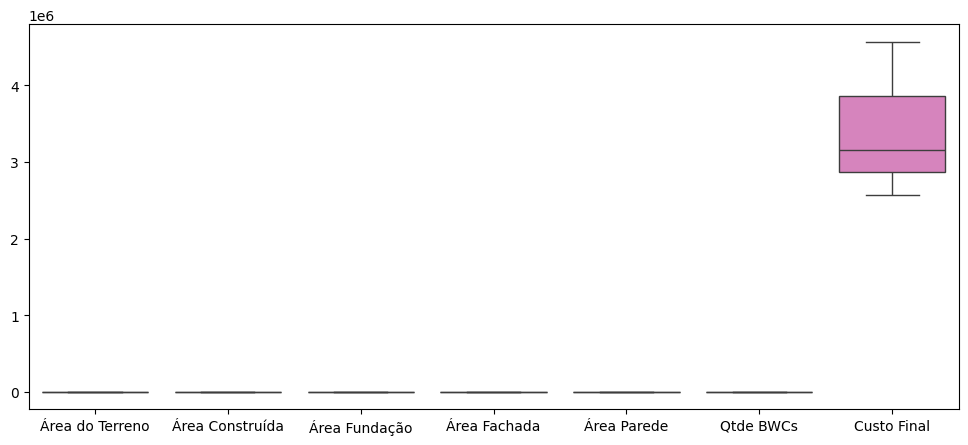

In [868]:
# Boxplots para representação da variação de dados observados de uma variável numérica por meio de quartis

plt.figure(figsize=(12,5))
sns.boxplot(df_projetos_1_2_3)
plt.show()

In [869]:
df_projetos_1_2_3.duplicated().sum()

0

In [870]:
df_projetos_1_2_3

,Tipologia,Área do Terreno,Área Construída,Área Fundação,Área Fachada,Área Parede,Qtde BWCs,Custo Final
0,Térrea,485.0,246.63,237.98,597.88,615.86,5.0,3155184.51
1,Sobrado,300.0,249.24,161.55,747.17,662.06,4.0,2570901.95
2,Sobrado,500.0,425.00,378.31,521.67,581.76,6.0,4569025.15


**É possível ver que não temos dados duplicados, nem dados faltantes e nulos (esses basta olhar o data frame). A média das variáveis (mean), o desvio padrão (std), o primeiro quartil (25%), a mediana (50%), o terceiro quartil (75%), o limite superior (max) e o limite inferior (min). Além disso, os boxplots nos ajuda a ver que não há valores discrepantes (_outliers_). Obviamente este data frame ainda é muito superficial para uma análise mais detalhada, mas ele servirá como base para compararmos com o data frame gerado com o _data augmentation_.**


**Agora vou aplicar as funções usadas na tabela orçamento para tratar o data frame do projeto 4, onde será feita a predição.**

In [871]:
df4 = treatment_lines_cols_table_dados(df4,None,8,'DADOS')

In [872]:
df4 = rename_columns(df4,'Tipologia','Área do Terreno','Área Construída','Área Fundação','Área Fachada','Área Parede','Qtde BWCs')


In [873]:
df4 = str_float_tab_dados(df4,1,7)

In [874]:
df4

,Tipologia,Área do Terreno,Área Construída,Área Fundação,Área Fachada,Área Parede,Qtde BWCs
0,Sobrado,250.0,257.0,221.36,430.11,547.27,6.0


***

### **Gerando novos dados a partir de perturbações gaussianas**

In [875]:
# Calcular os desvios padrão apenas das colunas numéricas

standard_deviation = df_projetos_1_2_3.select_dtypes(include=[np.number]).std()

# Definir desvio padrão pequeno para o ruído gaussiano
standard_deviation_perturb = 0.15  

# Gerar novos dados
new_data = pd.DataFrame()

for _ in range(200):
    # Gerar perturbação gaussiana para colunas numéricas
    perturbation = np.random.normal(loc=0, scale=standard_deviation * standard_deviation_perturb)

    # Copiar os dados originais para criar um novo dado
    new_data_1 = df_projetos_1_2_3.copy()

    # Aplicar perturbação apenas às colunas numéricas
    for coluna in df_projetos_1_2_3.select_dtypes(include=[np.number]).columns:
        new_data_1[coluna] += perturbation[df_projetos_1_2_3.columns.get_loc(coluna) - 1]

    # Arredondar a quantidade de BWCs e Área do Terreno para valores inteiros
    new_data_1['Qtde BWCs'] = new_data_1['Qtde BWCs'].astype(int)
    new_data_1['Área do Terreno'] = new_data_1['Área do Terreno'].astype(int)

    new_data = pd.concat([new_data, new_data_1], ignore_index=True)

# Adicionar os novos dados concatenados ao DataFrame original
df_final = pd.concat([df_projetos_1_2_3, new_data],ignore_index=True)

In [876]:
df_final

,Tipologia,Área do Terreno,Área Construída,Área Fundação,Área Fachada,Área Parede,Qtde BWCs,Custo Final
0,Térrea,485.0,246.630000,237.980000,597.880000,615.860000,5.0,3.155185e+06
1,Sobrado,300.0,249.240000,161.550000,747.170000,662.060000,4.0,2.570902e+06
2,Sobrado,500.0,425.000000,378.310000,521.670000,581.760000,6.0,4.569025e+06
3,Térrea,472.0,244.028002,254.991271,599.081714,610.646098,4.0,3.384422e+06
4,Sobrado,287.0,246.638002,178.561271,748.371714,656.846098,3.0,2.800139e+06
...,...,...,...,...,...,...,...,...
598,Sobrado,299.0,225.687878,133.404146,765.725104,669.977392,3.0,2.330058e+06
599,Sobrado,499.0,401.447878,350.164146,540.225104,589.677392,5.0,4.328181e+06
600,Térrea,483.0,243.760236,220.050750,598.833952,618.631935,5.0,3.308549e+06
601,Sobrado,298.0,246.370236,143.620750,748.123952,664.831935,4.0,2.724267e+06


**Aqui cabe uma observação. A etapa que será feita adiante, deveria ser ralizada em Data Understanding, porém, durante a leitura dos dados, a "tabela DADOS" e a "tabela Orçamento" que seriam usadas para análise estavam se misturando, e foi aí que precisei reestruturar separando as tabelas e mantendo no data set final somente as variáveis que seriam utilizadas na predição.**

In [877]:
df_final.describe()

,Área do Terreno,Área Construída,Área Fundação,Área Fachada,Área Parede,Qtde BWCs,Custo Final
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,6.030000e+02
mean,427.059701,307.382505,258.951380,623.778707,619.692712,4.492537,3.424112e+06
std,92.366361,85.197857,91.406116,95.220905,33.527632,0.958193,8.512795e+05
min,258.000000,182.665855,122.494299,484.099893,565.176731,3.000000,2.237927e+06
25%,309.000000,243.353375,174.962470,534.476530,585.931139,4.000000,2.657389e+06
50%,480.000000,258.876903,235.669236,598.485684,615.417988,4.000000,3.140198e+06
75%,497.000000,415.220304,366.200282,736.376277,657.127028,5.000000,4.456662e+06
max,553.000000,471.202505,420.636288,785.311566,679.598091,6.000000,4.895057e+06


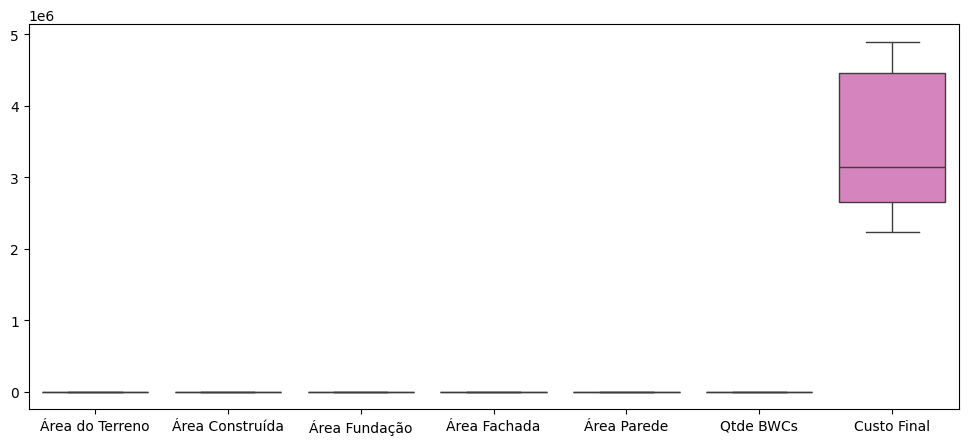

In [878]:
plt.figure(figsize=(12,5))
sns.boxplot(df_final)
plt.show()

In [879]:
df_final.duplicated().sum()

0

In [880]:
df_final.isna().sum()

Tipologia          0
Área do Terreno    0
Área Construída    0
Área Fundação      0
Área Fachada       0
Área Parede        0
Qtde BWCs          0
Custo Final        0
dtype: int64

**É importante ver que o aumento dos dados mostrou uma boa variação nos valores das estatísticas descritivas em relação ao data frame dos projetos 1, 2 e 3, o que nos oferece uma quantidade de dados interessante para realizar a predição, e obviamente sem outliers já que as perturbações não produziram valores muito além dos valores presentes dn data set original.**

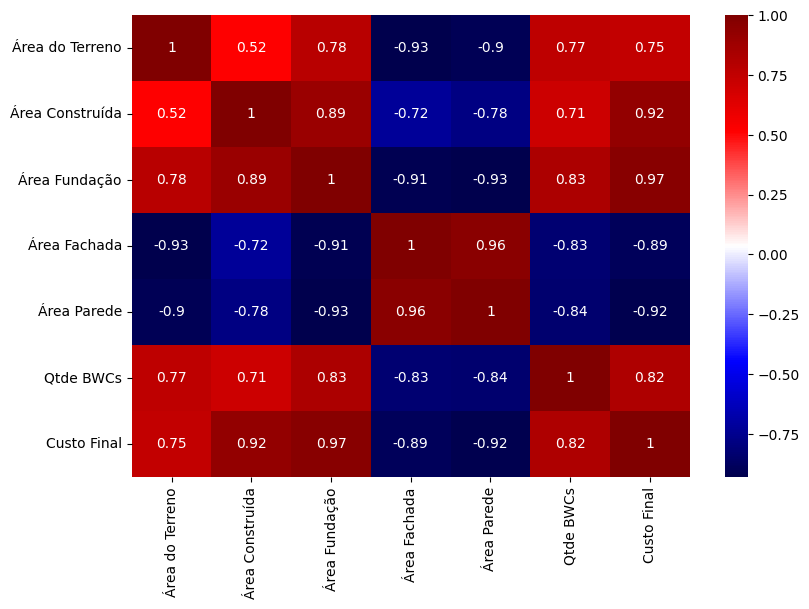

In [881]:
plt.figure(figsize=(9,6))
sns.heatmap(df_final.drop(['Tipologia'],axis=1).corr(),annot=True,cmap='seismic')
plt.show()

**Temos variáveis independentes muito bem correlacionadas e isso quando analisado pela ótica da multicolinearidade podem trazer alguns problemas ao modelo, como por exemplo um coeficiente de determinação $(r^2)$ inflacionado. Vou aplicar dois métodos:**

**1) Fator de inflação da variância (VIF);**

**2) PCA para analisar quantos componentes principais são relevantes para a análise, evitando a retenção de componentes que apenas capturam ruído nos dados.**


**Farei isso para comparar os resultados de todas as possibilidades.**

In [882]:
df_final

,Tipologia,Área do Terreno,Área Construída,Área Fundação,Área Fachada,Área Parede,Qtde BWCs,Custo Final
0,Térrea,485.0,246.630000,237.980000,597.880000,615.860000,5.0,3.155185e+06
1,Sobrado,300.0,249.240000,161.550000,747.170000,662.060000,4.0,2.570902e+06
2,Sobrado,500.0,425.000000,378.310000,521.670000,581.760000,6.0,4.569025e+06
3,Térrea,472.0,244.028002,254.991271,599.081714,610.646098,4.0,3.384422e+06
4,Sobrado,287.0,246.638002,178.561271,748.371714,656.846098,3.0,2.800139e+06
...,...,...,...,...,...,...,...,...
598,Sobrado,299.0,225.687878,133.404146,765.725104,669.977392,3.0,2.330058e+06
599,Sobrado,499.0,401.447878,350.164146,540.225104,589.677392,5.0,4.328181e+06
600,Térrea,483.0,243.760236,220.050750,598.833952,618.631935,5.0,3.308549e+06
601,Sobrado,298.0,246.370236,143.620750,748.123952,664.831935,4.0,2.724267e+06


In [883]:
df_final = df_final.drop(columns=['Tipologia'])

#### **VIF**

In [884]:
X = sm.add_constant(df_final.drop(columns=['Custo Final']))  # Se 'Y' for sua variável dependente

# Ajustar o modelo de regressão linear
model = sm.OLS(df_final['Custo Final'], X).fit()

# Calcular o VIF para cada variável independente
vif = pd.DataFrame()
vif["Variável"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

          Variável           VIF
0            const  12264.981974
1  Área do Terreno     16.389484
2  Área Construída     10.106537
3    Área Fundação     19.797772
4     Área Fachada     22.411432
5      Área Parede     23.794046
6        Qtde BWCs      3.695383


**Vou remover as 3 variáveis independentes com os maiores valores de VIF, neste caso: 'Área Fundação', 'Área Fachada' e 'Área Parede'.**

In [885]:
df_final_vif = df_final.drop(columns=['Área Fundação', 'Área Fachada', 'Área Parede'])

#### **PCA**

In [886]:
def pca_method(df, n_component):
    """
    Realiza a Análise de Componentes Principais (PCA) no DataFrame de entrada.

    Params:
      df: DataFrame de entrada contendo os dados para realizar o PCA.
      n_component (int): Número de componentes principais a serem mantidos.

      Return:
         DataFrame: O DataFrame contendo os dados transformados após o PCA.
    """
    pca = PCA(n_components = n_component)
    df = pd.DataFrame(pca.fit_transform(df))
    return df 
    

def pca_(df,n_component):
    """
    Realiza a Análise de Componentes Principais (PCA) e visualiza a razão de variância explicada.

    Params:
        df: DataFrame de entrada contendo os dados para realizar o PCA.
        n_component (int): Número de componentes principais a serem considerados.

    Return:
        Gráfico: Objeto que contém o gráfico de Pareto.

    """
    pca = PCA(n_components = n_component)
    pca.fit_transform(df)
    return pareto(pca.explained_variance_ratio_)

In [887]:
pca = PCA()
pca.fit(df_final.drop(columns=['Custo Final']))

variancia_explicada = pca.explained_variance_ratio_
variancia_explicada_cumulativa = np.cumsum(variancia_explicada)
variancia_explicada_cumulativa

array([0.85780367, 0.98169007, 0.99066212, 0.99867017, 0.99999276,
       1.        ])

In [888]:
limiar = 0.95  
num_componentes = np.argmax(variancia_explicada_cumulativa >= limiar) + 1
print(f'O número de componentes relevantes é {num_componentes}.')

O número de componentes relevantes é 2.


In [889]:
df_final_pca = pca_method(df_final.drop(columns=['Custo Final']),2)

(<Figure size 640x480 with 2 Axes>, <Axes: >, <Axes: >)

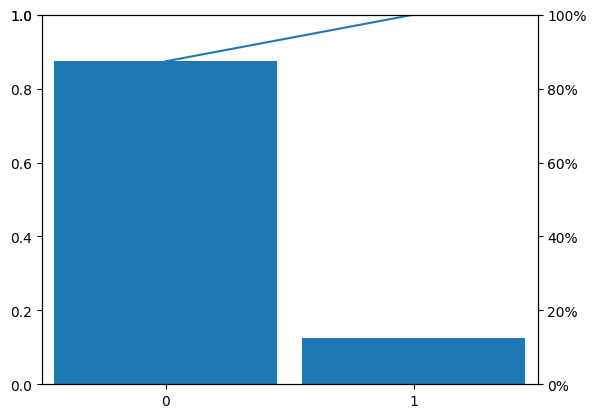

In [890]:
pca_(df_final_pca,2)

In [891]:
df_projetos = pd.concat([df_projetos_1_2_3, df4],ignore_index=True)
df_projetos = df_projetos.drop(columns=['Tipologia','Custo Final'])
df_projetos

,Área do Terreno,Área Construída,Área Fundação,Área Fachada,Área Parede,Qtde BWCs
0,485.0,246.63,237.98,597.88,615.86,5.0
1,300.0,249.24,161.55,747.17,662.06,4.0
2,500.0,425.00,378.31,521.67,581.76,6.0
3,250.0,257.00,221.36,430.11,547.27,6.0


In [892]:
df_projetos_vif = pd.concat([df_projetos_1_2_3, df4],ignore_index=True)
df_projetos_vif = df_projetos_vif.drop(columns=['Tipologia','Custo Final', 'Área Fundação', 'Área Fachada', 'Área Parede'])
df_projetos_vif

,Área do Terreno,Área Construída,Qtde BWCs
0,485.0,246.63,5.0
1,300.0,249.24,4.0
2,500.0,425.00,6.0
3,250.0,257.00,6.0


In [893]:
df_projetos_pca = pca_method(df_projetos,2)
df_projetos_pca

,0,1
0,11.975902,-74.847369
1,-205.359538,-79.574213
2,212.393005,-54.059523
3,-19.009369,208.481105


In [894]:
df_final_pca['Custo Final'] = df_final['Custo Final']

## <font color="Blue">**Etapa 4: Modeling**

In [895]:
class Models_Applications():
    """
    Classe para aplicar modelos de machine learning nos projetos das casas.

    Methods:
        __init__(self): Inicializa a classe.
        models_applications(self, df, df_pred, model1, model2, scaler): Aplica dois modelos de machine learning aos dados, avalia o desempenho e faz previsões em novos dados.
        plot_graphic(self, y_pred): Plota um gráfico de dispersão entre os valores reais e previstos.
        neural_net(self, df_pred, model): Implementa uma rede neural, treina, avalia o desempenho e faz previsões.
    """
    
    def __init__(self):
        """
        Inicializa a classe.
        """
        pass

    def models_applications(self,df,df_pred,model1,model2,scaler):
        """
        Aplica dois modelos de machine learning aos dados, avalia o desempenho e faz previsões em novos dados.

        Params:
            df (DataFrame): O conjunto de dados para treinar e testar os modelos.
            df_pred (DataFrame): Os novos dados para fazer previsões.
            model1: O primeiro modelo de machine learning a ser aplicado.
            model2: O segundo modelo de machine learning a ser aplicado.
            scaler: O objeto para escalonar os dados.

        Return:
            None
        """

    # Separando a variável target
        self.x = df.drop(['Custo Final'], axis=1)
        self.y = df[['Custo Final']]


    # Separando em treino e teste
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.x, self.y, test_size=0.20, random_state=42)

        # Criando o pipeline
        pipe1 = Pipeline([
            ('scaler', scaler),
            ('model', model1)
        ])

        pipe2 = Pipeline([
            ('scaler', scaler),
            ('model', model2)

        ])


        # Treinando o modelo

        pipe1.fit(self.x_train, self.y_train)
        pipe2.fit(self.x_train, self.y_train)


        # Fazer previsões base teste

        y_pred_1 = pipe1.predict(self.x_test)

        y_pred_2 = pipe2.predict(self.x_test)


        # Avaliando o modelo

        rmse_model1 = np.sqrt(mean_squared_error(self.y_test, y_pred_1))
        mae_model1 = mean_absolute_error(self.y_test, y_pred_1)
        r2_model1 = r2_score(self.y_test, y_pred_1)

        rmse_model2 = np.sqrt(mean_squared_error(self.y_test, y_pred_2))
        mae_model2 = mean_absolute_error(self.y_test, y_pred_2)
        r2_model2 = r2_score(self.y_test, y_pred_2)


        # Fazer previsões nos novos dados

        projetos_model1 = pipe1.predict(df_pred)
        projetos_model2 = pipe2.predict(df_pred)

        print('='*30)
        print(f'Modelo 1: {model1}')
        print('='*30)
        print(f'Projeto 1: R$ {projetos_model1[0][0]}')
        print(f'Projeto 2: R$ {projetos_model1[1][0]}')
        print(f'Projeto 3: R$ {projetos_model1[2][0]}')
        print(f'Projeto 4: R$ {projetos_model1[3][0]}')
        print('='*30)
        print(f'RMSE: {rmse_model1}')
        print(f'MAE: {mae_model1}')
        print(f'R²: {r2_model1}')
        print('\n')
        print('='*30)
        print(f'Modelo 2: {model2}')
        print('='*30)
        print(f'Projeto 1: R$ {projetos_model2[0]}')
        print(f'Projeto 2: R$ {projetos_model2[1]}')
        print(f'Projeto 3: R$ {projetos_model2[2]}')
        print(f'Projeto 4: R$ {projetos_model2[3]}')
        print('='*30)
        print(f'RMSE: {rmse_model2}')
        print(f'MAE: {mae_model2}')
        print(f'R²: {r2_model2}')

        self.plot_graphic(y_pred_1)
        self.plot_graphic(y_pred_2)


    # Criando o DataFrame para gerar o gráfico entre os valores reais e preditos 
    def plot_graphic(self,y_pred):
        """
        Plota um gráfico de dispersão entre os valores reais e previstos.

        Params:
            y_pred: Os valores previstos.

        Return:
            Gráfico: Objeto que contém o gráfico de dispersão entre os valores reais e previstos.
        """
        y_test_series = pd.Series(np.ravel(self.y_test), name='valores reais')
        y_pred_series = pd.Series(np.ravel(y_pred), name='previsões')
        data_graphic = pd.concat([y_test_series, y_pred_series], axis=1)
        sns.scatterplot(data=data_graphic, x='valores reais', y='previsões', hue='previsões', palette='winter', legend=False)
        plt.title('Valores Reais vs Valores Previstos - Regressão Linear')
        plt.plot([min(y_test_series), max(y_test_series)], [min(y_test_series), max(y_test_series)], 'k--', lw=2)
        return plt.show()

    def neural_net(self,df_pred,model):
        """
        Implementa uma rede neural, treina, avalia o desempenho e faz previsões.

        Params:
            df_pred (Data Frame): Os novos dados para fazer previsões.
            model: O modelo de rede neural a ser utilizado.

        Return:
            None
        """
            
        # Adicionando as camadas
        model.add(Dense(64, input_dim=self.x_train.shape[1], activation='relu'))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(16, activation='relu'))
    # Camada de saída para regressão
        model.add(Dense(1, activation='linear')) 

    # Compilando o modelo
        model.compile(optimizer='adam', loss='mean_squared_error')

    # Treinar o modelo
        history = model.fit(self.x_train, self.y_train, epochs=100, batch_size=60, validation_split=0.2,verbose=False)

    # Avaliar o modelo
        loss = model.evaluate(self.x_test, self.y_test)
        print(f'Loss: {loss}')

    # Fazer previsões
        y_pred = model.predict(self.x_test)
        rede = model.predict(df_pred)

    # Avaliando o modelo

        rmse = np.sqrt(mean_squared_error(self.y_test, y_pred))
        mae = mean_absolute_error(self.y_test, y_pred)


    # Plotar a perda durante o treinamento
        plt.plot(history.history['loss'], label='Treino - perda')
        plt.plot(history.history['val_loss'], label='Validação - perda')
        plt.legend()
        plt.show()

        print('='*30)
        print(f'Modelo: {model}')
        print('='*30)
        print(f'Projeto 1: R$ {rede[0][0]}')
        print(f'Projeto 2: R$ {rede[1][0]}')
        print(f'Projeto 3: R$ {rede[2][0]}')
        print(f'Projeto 4: R$ {rede[3][0]}')
        print('='*30)
        print(f'RMSE: {rmse}')
        print(f'MAE: {mae}')

#### **Predição sem uso da PCA e VIF: data frame projetos - Modelos: Regressão Linear, Random Forest Regressor e Rede Neural (Sequential)**

In [896]:
# Criando instância da classe
app = Models_Applications()

Modelo 1: LinearRegression()
Projeto 1: R$ 3180696.4457406662
Projeto 2: R$ 2571726.2170933965
Projeto 3: R$ 4564242.343321669
Projeto 4: R$ 3463660.7877272363
RMSE: 167526.06134095468
MAE: 135049.95490903355
R²: 0.960960149760555


Modelo 2: RandomForestRegressor(n_estimators=1000, random_state=42)
Projeto 1: R$ 3153078.836546486
Projeto 2: R$ 2573481.6706099836
Projeto 3: R$ 4594623.318769978
Projeto 4: R$ 3438933.170395104
RMSE: 149885.0754950142
MAE: 121670.48474617425
R²: 0.9687492698379256


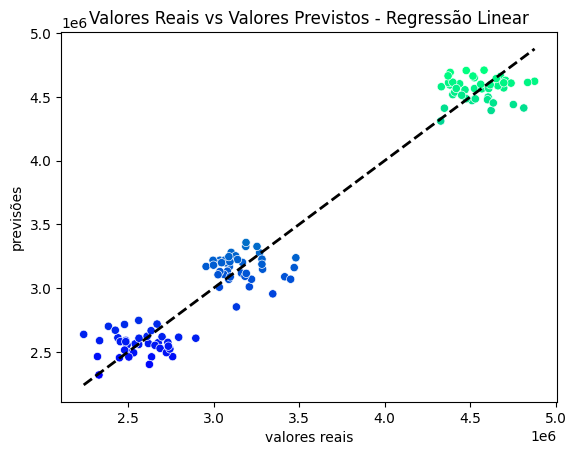

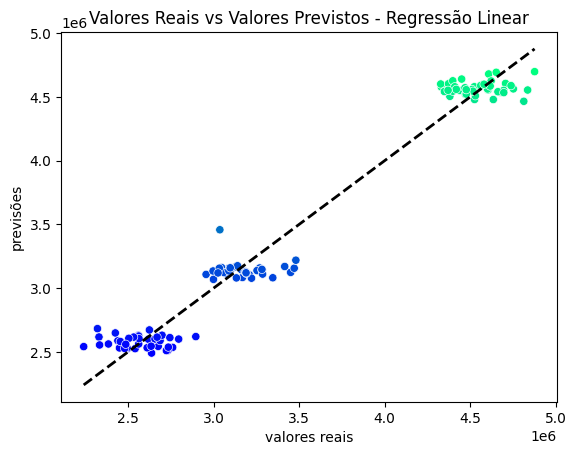

4/4 [==============================] - 0s 4ms/step - loss: 417102397440.0000
Loss: 417102397440.0
1/1 [==============================] - 0s 52ms/step


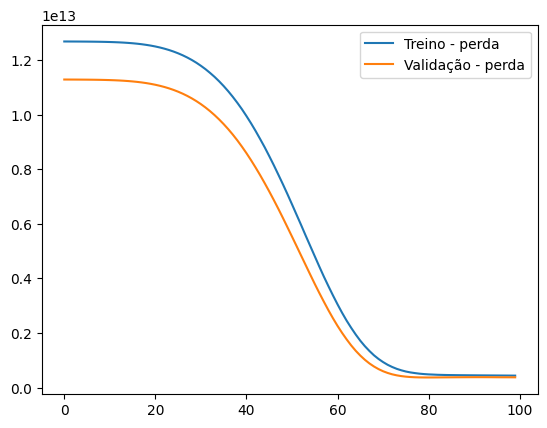

Modelo: <keras.src.engine.sequential.Sequential object at 0x169dff430>
Projeto 1: R$ 3404270.0
Projeto 2: R$ 3280910.5
Projeto 3: R$ 3766464.25
Projeto 4: R$ 2656356.5
RMSE: 645834.6199728368
MAE: 584037.2281304187


In [897]:
# Chamando o método models_applications
app.models_applications(df_final,df_projetos,LinearRegression(),RandomForestRegressor(n_estimators=1000,random_state=42),StandardScaler())
app.neural_net(df_projetos,Sequential())


#### **Predição com uso do VIF: data frame projetos_vif - Modelos: Regressão Linear, Random Forest Regressor e Rede Neural (Sequential)**

Modelo 1: LinearRegression()
Projeto 1: R$ 3193213.4194058115
Projeto 2: R$ 2603899.796848266
Projeto 3: R$ 4566390.575345279
Projeto 4: R$ 2629920.262187518
RMSE: 190812.00046176053
MAE: 144876.61560387348
R²: 0.9493528798100398


Modelo 2: RandomForestRegressor(n_estimators=1000, random_state=10)
Projeto 1: R$ 3148738.0059165335
Projeto 2: R$ 2579003.81522435
Projeto 3: R$ 4672337.50296125
Projeto 4: R$ 2491236.3816475477
RMSE: 156406.12587560975
MAE: 124152.823760697
R²: 0.9659708654017226


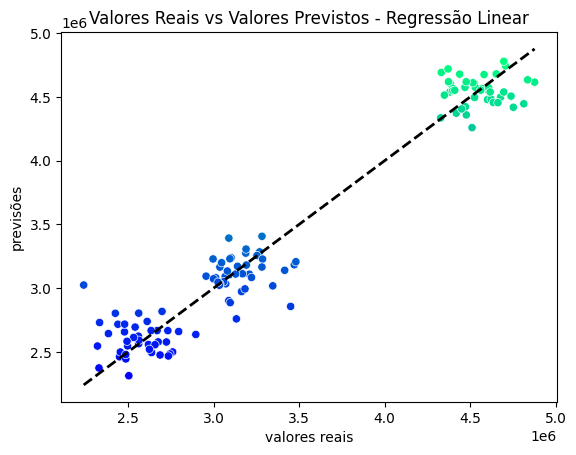

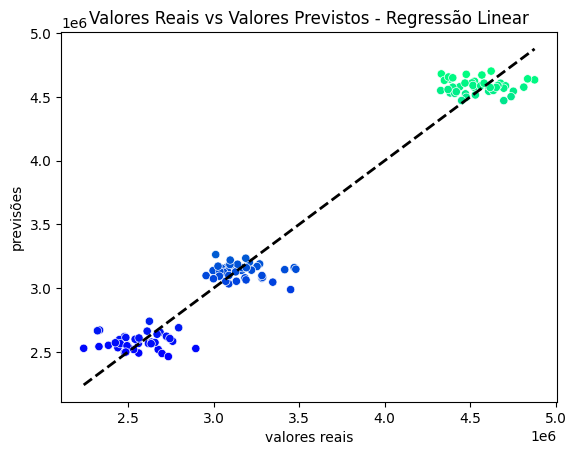

4/4 [==============================] - 0s 7ms/step - loss: 141222707200.0000
Loss: 141222707200.0
1/1 [==============================] - 0s 27ms/step


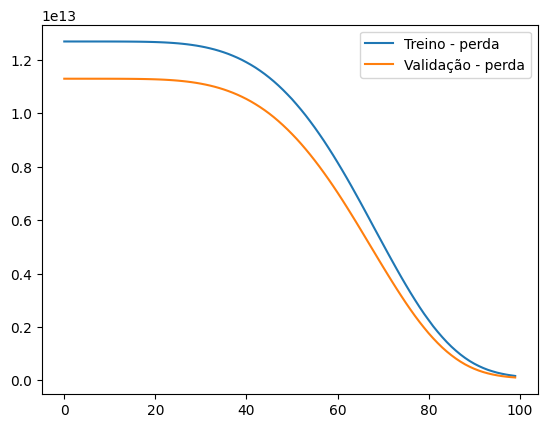

Modelo: <keras.src.engine.sequential.Sequential object at 0x165fbea10>
Projeto 1: R$ 3182778.75
Projeto 2: R$ 2382158.0
Projeto 3: R$ 4005524.0
Projeto 4: R$ 2204397.5
RMSE: 375796.04657299374
MAE: 296675.38031668967


In [898]:
app.models_applications(df_final_vif,df_projetos_vif,LinearRegression(),RandomForestRegressor(n_estimators=1000,random_state=10),StandardScaler())
app.neural_net(df_projetos_vif,Sequential())

#### **Predição com uso da PCA: data frame projetos_pca - Modelos: Regressão Linear, Random Forest Regressor e Rede Neural (Sequential)**

Modelo 1: LinearRegression()
Projeto 1: R$ 3606101.5130880405
Projeto 2: R$ 4649736.939527456
Projeto 3: R$ 2591413.152271144
Projeto 4: R$ 2850900.1938349837
RMSE: 168590.03380174367
MAE: 135710.71373195678
R²: 0.9604626841272966


Modelo 2: RandomForestRegressor(n_estimators=1000, random_state=10)
Projeto 1: R$ 2659867.3561280947
Projeto 2: R$ 4563723.142750818
Projeto 3: R$ 2608792.730533691
Projeto 4: R$ 3096753.3870306606
RMSE: 175329.72138453907
MAE: 137925.86658978625
R²: 0.9572383482534655


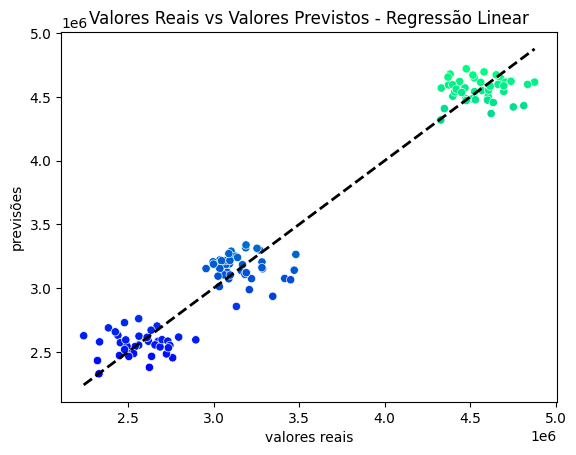

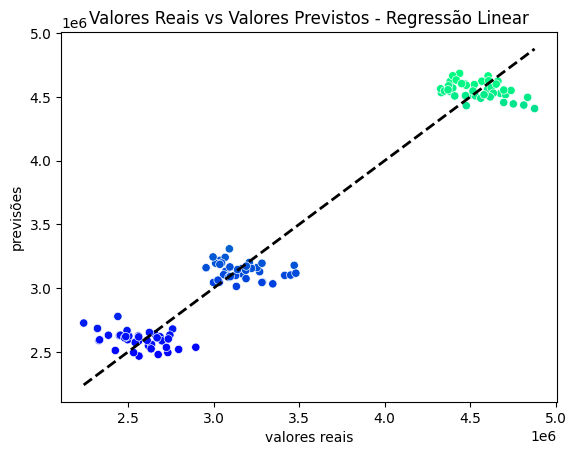

4/4 [==============================] - 0s 4ms/step - loss: 867105177600.0000
Loss: 867105177600.0
1/1 [==============================] - 0s 27ms/step


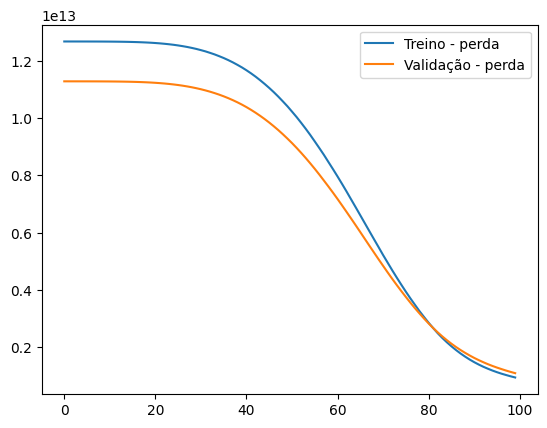

Modelo: <keras.src.engine.sequential.Sequential object at 0x16ab2ece0>
Projeto 1: R$ 1132543.5
Projeto 2: R$ 4208849.5
Projeto 3: R$ 2660677.25
Projeto 4: R$ 3733996.5
RMSE: 931184.7946505314
MAE: 670056.1310648374


In [899]:
app.models_applications(df_final_pca,df_projetos_pca,LinearRegression(),RandomForestRegressor(n_estimators=1000,random_state=10),StandardScaler())
app.neural_net(df_projetos_pca,Sequential())

## <font color="Blue">**Etapa 5: Deployment**

Neste projeto foram usadas as seguintes prescrições com diferentes aplicações: 

1) Data set completo, onde foram feitas perturbações em torno dos valores originais usando como base os três projetos;
2) Data set com aplicação do VIF devido a alta correlação entre algumas variáveis;
3) Data set com aplicação da PCA para verificar quantos componentes principais são relevantes para a análise, pelo mesmo motivo descrito acima.
 
Em cada um destes três conjuntos foram aplicados três modelos: Regressão Linear, Random Forest Regressor e uma Rede Neural.

**Para avaliar a melhor performance utilizei as métricas RMSE, MAE e $r^2$ e os valores do custo total dos projetos 1, 2 e 3 para comparar com os valores preditos pelos modelos. Sendo assim, o modelo que apresentou os melhores resultados foi do Random Forest Regressor no Data set sem aplicação do VIF e da PCA, cujos resultados seguem abaixo:**
***
Projeto 1: R$ 3.153.078,84

Projeto 2: R$ 2.573.481,67

Projeto 3: R$ 4.594.623,32

Projeto 4: R$ 3.463.660,79

***

RMSE: R$ 149.885,09

MAE: R$ 121.670,49

R²: 0.97

***

Abaixo segue os valores reais dos projetos 1, 2 e 3, respectivamente:

Projeto 1: R$ 3.155.184,51

Projeto 2: R$ 2.570.901,95

Projeto 3: R$ 4.569.025,15


A partir daí, podemos ver que a diferença de valor entre cada projeto foi de :

Projeto 1: R$ 2.105,67

Projeto 2: R$ 2.579,72

Projeto 3: R$ 25.598,17


Se analisarmos o percentual do RMSE e MAE, em relação aos valores de cada projeto temos, respectivamente:

Projeto 1: RMSE = 4,8% e MAE = 3,8%

Projeto 2: RMSE = 5,8% e MAE = 4,7%

Projeto 3: RMSE = 3,2% e MAE = 2,6%

Projeto 4: RMSE = 4,3% e MAE = 3,5%

Os gráficos das regressões mostraram bons ajustes, e isso podemos ver pelo valor do coeficiente de determinação. 

Apesar de ter aplicado VIF e PCA, posso concluir que não é interessante remover variáveis ou reduzir a dimensionalidade.